##klasifikasiBeritaLDA

In [5]:
# Instal library jika belum ada (jalankan sekali saja)
!pip install gensim pyLDAvis nltk scikit-learn

# Import library utama
import pandas as pd
import numpy as np
import re
import gensim
from gensim import corpora
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download resource NLTK
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import pandas as pd

# Upload manual di Colab
from google.colab import files
uploaded = files.upload()

# Baca file dengan deteksi otomatis dan encoding aman
df = pd.read_csv(
    list(uploaded.keys())[0],
    encoding='utf-8',
    on_bad_lines='skip'  # lewati baris rusak kalau ada
)

print("Jumlah data:", len(df))
print("Nama kolom:", df.columns.tolist())
df.head()


Saving detik_berita_10_pages.csv to detik_berita_10_pages (1).csv
Jumlah data: 199
Nama kolom: ['id_berita', 'judul_berita', 'isi_berita_original', 'isi_berita_diproses', 'kategori_berita']


,id_berita,judul_berita,isi_berita_original,isi_berita_diproses,kategori_berita
0,8140101,"Gadis Pujaan Dipacari Teman, Pria di Bekasi Tu...",Seorang pria berinisial EP alias A (26)tewas d...,orang aria initial ep alias a teas team temann...,hukum
1,8140094,"Info BSU Bulan Oktober 2025, Apakah Dana Cair ...","Setelah cair di bulan Juni dan Juli 2025, masi...",car buran junk julia banyan tanya danabsukemba...,hukum
2,8140088,Pansus DPRD DKI Segel 4 Parkir Ilegal: Potensi...,Panitia Khusus (Pansus) Perparkiran DPRD DKI J...,anita rhesus passus parker did dki jakarta heg...,hukum
3,8140084,KPK Tahan Eks Dirut PGN di Kasus Jual-Beli Gas...,KPKresmi menahan mantan Direktur Utama (Dirut)...,kpkresmi than manta director mama dirt pt sara...,hukum
4,8140077,DPR RI Sahkan Revisi UU BUMN Besok,Komisi VI DPRtelah menyepakati revisi UU BUMN ...,komi vi dprtelah part revisit uu burn baba par...,hukum


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [7]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # 🔥 tambahkan ini untuk versi NLTK terbaru
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Membersihkan teks dan tokenisasi
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))  # Hapus angka & simbol
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return tokens

df['tokens'] = df['isi_berita_diproses'].apply(clean_text)
df[['isi_berita_diproses', 'tokens']].head()

,isi_berita_diproses,tokens
0,orang aria initial ep alias a teas team temann...,"[orang, aria, initial, alias, teas, team, tema..."
1,car buran junk julia banyan tanya danabsukemba...,"[car, buran, junk, julia, banyan, danabsukemba..."
2,anita rhesus passus parker did dki jakarta heg...,"[anita, rhesus, passus, parker, did, dki, jaka..."
3,kpkresmi than manta director mama dirt pt sara...,"[kpkresmi, than, manta, director, mama, dirt, ..."
4,komi vi dprtelah part revisit uu burn baba par...,"[komi, dprtelah, part, revisit, burn, baba, pa..."


In [9]:
# Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Tentukan jumlah topik
num_topics = 5

# Bangun model LDA
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10
)

# Tampilkan kata kunci tiap topik
for i, topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    print(f"\nTopik {i}:")
    print([word for word, _ in topic])



Topik 0:
['program', 'liter', 'dpr', 'literdexlite', 'literpertamax', 'mbg', 'laku', 'dad', 'indonesia', 'data']

Topik 1:
['korban', 'anggota', 'jakarta', 'pensiun', 'laku', 'dpr', 'mohon', 'evakuasi', 'orang', 'with']

Topik 2:
['emas', 'indonesia', 'pancasila', 'harga', 'dpr', 'hard', 'ruu', 'batik', 'gram', 'uang']

Topik 3:
['laku', 'orang', 'korban', 'indonesia', 'scroll', 'with', 'continue', 'content', 'sangka', 'jakarta']

Topik 4:
['indonesia', 'kerja', 'asean', 'china', 'usaha', 'miliar', 'continue', 'with', 'content', 'scroll']


In [10]:
# Ubah hasil distribusi topik menjadi fitur numerik
def get_lda_features(lda_model, corpus, num_topics):
    lda_features = np.zeros((len(corpus), num_topics))
    for i, doc in enumerate(corpus):
        for topic_num, prob in lda_model.get_document_topics(doc):
            lda_features[i, topic_num] = prob
    return lda_features

X = get_lda_features(lda_model, corpus, num_topics)
print("Ukuran fitur LDA:", X.shape)


Ukuran fitur LDA: (199, 5)


In [11]:
# Encode kategori menjadi angka
le = LabelEncoder()
y = le.fit_transform(df['kategori_berita'])

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
# Latih model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Akurasi: 0.7

Laporan Klasifikasi:
               precision    recall  f1-score   support

     ekonomi       0.61      0.94      0.74        18
       hukum       0.92      0.55      0.69        20
     politik       0.00      0.00      0.00         2

    accuracy                           0.70        40
   macro avg       0.51      0.50      0.48        40
weighted avg       0.73      0.70      0.68        40



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

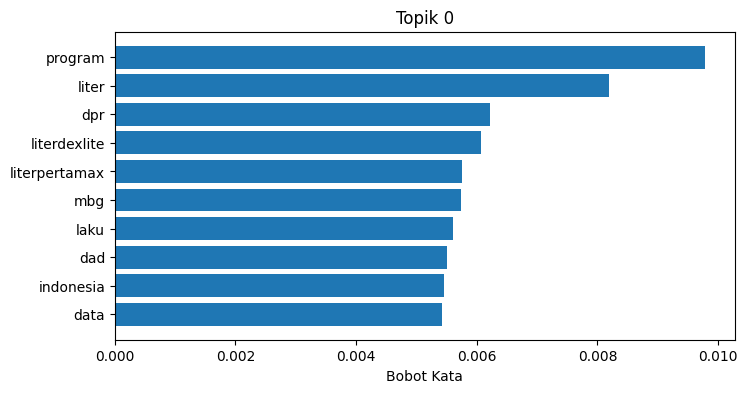

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

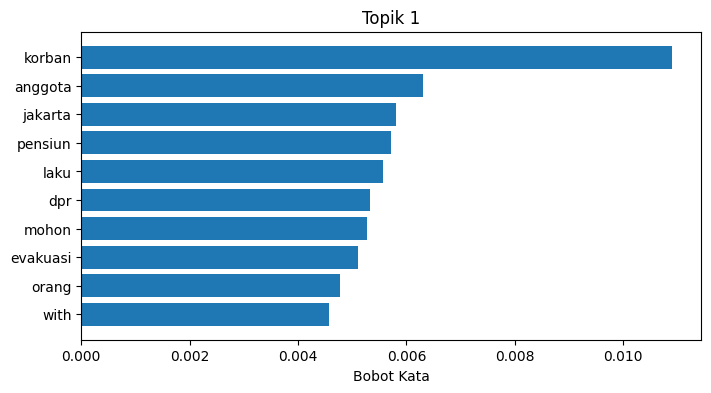

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

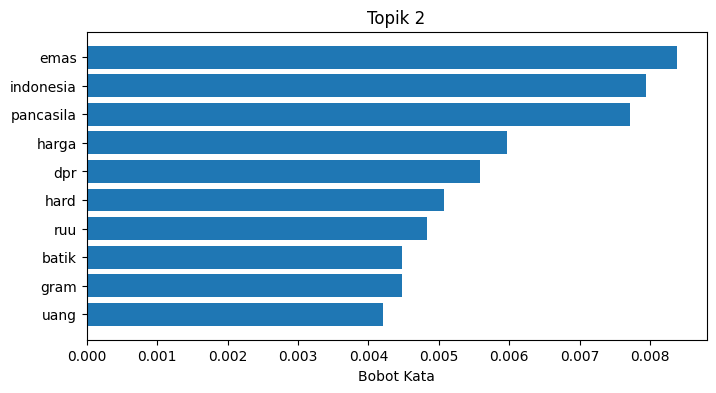

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

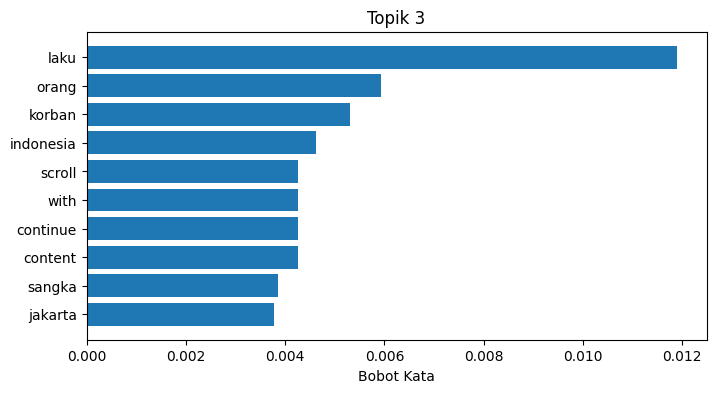

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

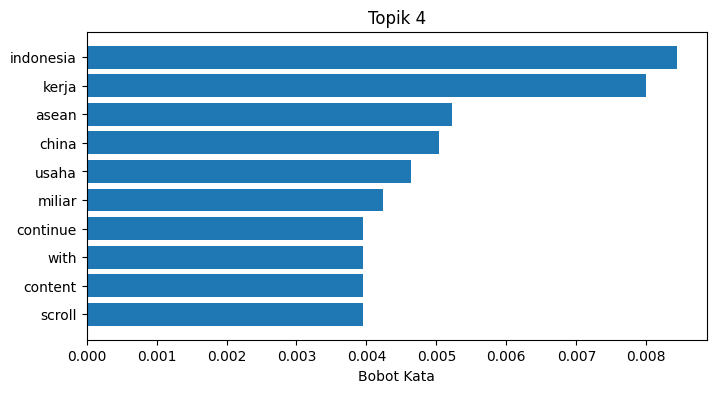

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [14]:
import matplotlib.pyplot as plt

topics = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)

for i, topic in topics:
    words = [w for w, p in topic]
    weights = [p for w, p in topic]
    plt.figure(figsize=(8, 4))
    plt.barh(words, weights)
    plt.gca().invert_yaxis()
    plt.title(f"Topik {i}")
    plt.xlabel("Bobot Kata")
    plt.show()
